In [1]:
import numpy as np
import math
import os
# import imageio
from barrier3d import Barrier3d
from cascade.outwasher_reorg_FF import Outwasher
from cascade.outwasher_reorg_FF import (plot_ElevAnimation, plot_DischargeAnimation, plot_SlopeAnimation, 
plot_Qs2Animation, plot_SedOutAnimation, plot_SedInAnimation)
import matplotlib.pyplot as plt
import imageio
import csv
with open(r"C:\Users\Lexi\Documents\Research\Outwasher\chris stuff\sound_data.txt", newline='') as csvfile:
    sound_data = list(csv.reader(csvfile))[0]
sound_data = [float(s) / 10 - 0.054 for s in sound_data]  # [dam MHW] Chris' sound elevations were in m MSL,
# so converted to NAVD88 then MHW and dam
sound_data = [s + 0.05 for s in sound_data]  # [dam MHW] just increasing the values
# setting all negative values to 0
sound_data = sound_data[20:]
for index, value in enumerate(sound_data):
    #     # smaller used 0.05
    if value > 0.220:
        sound_data[index] = 0.220
sound_data[0] = 0

<div class="alert alert-block alert-info"><b>Configuration:</b> Substep = 2, Cx = 10, Ki = 7.5x10$^{-3}$.
    Apply a fudge factor to the first row to simulate appropriate flows at the dune gaps: sum all cellular discharges through gaps and divide by the alongshore length. Multiply by a fudge factor (10)
</div>

In [3]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
b3d.update()
b3d.update_dune_domain()

path = "D:/NC State/Outwasher/Output/full_hydro/"
runID = "no_dune_erosion_FF10_Kie-3_substep2"
newpath = path + runID + "/"
# storm series is year the storm occured, the bay elevation for every time step, and the duration of the storm
storm_series = [1, sound_data, len(sound_data)]

outwash = Outwasher(b3d, runID, path, substep=2, Cx=10, Ki=7.5E-3,)
discharge, elev_change, domain, qs_lost, slopes2, dictionary, qs2, storm_data, sedout, sedin, domain_array, OW_TS, 
dis_comp_array \
= outwash.update(storm_series, b3d, fudge_fac=10)

0
1
2
3
4
5
6
calculated discharge through gaps: [6.10927907 6.10927907 6.10927907 6.10927907 6.10927907 0.
 0.         0.         0.         0.         0.         2.48858982
 2.48858982 2.48858982 0.         0.         0.         2.72445496
 0.         0.         8.16814998 8.16814998 8.16814998 0.
 0.         3.6606851  0.         0.         0.         0.
 0.         7.29543891 7.29543891 7.29543891 7.29543891 0.
 0.         0.         6.20632221 6.20632221 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
discharge at dune gaps after flow routing: [16.34853578 28.95170231 25.06652577 27.00032313 27.18834862 28.31637103
 22.59969808 24.64116376 24.37649797 26.22581041 23.85440406 27.12867298
 24.12388757 26.2658834  24.53534307 24.41683902 21.98404518 25.01890232
 26.77376586 22.17026405 28.10226954 27.03475717 26.08813736 24.86387794
 23.34638762 25.00801819 27.26779254 22.316605   25.97968191 23.91705952
 21.47556103 26.78602908 25.572

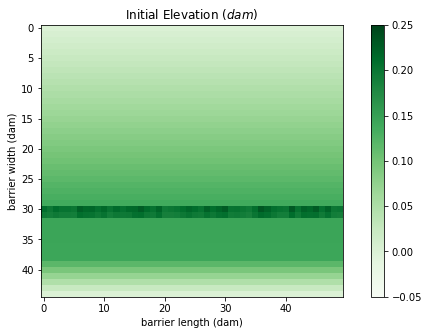

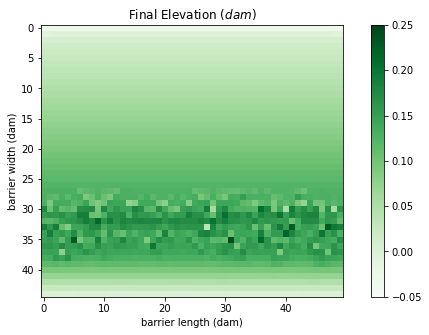

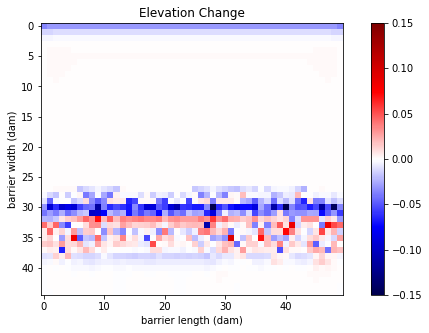

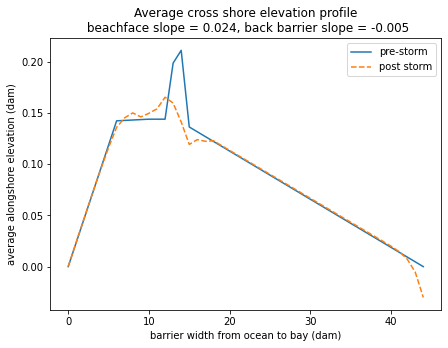

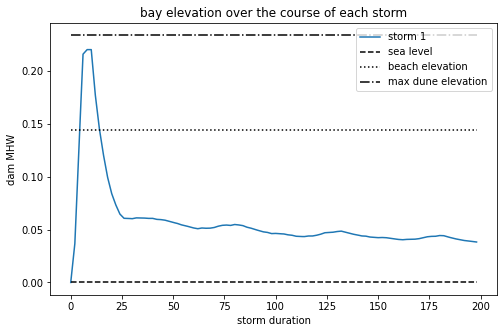

[ * elevation GIF successfully generated * ]

[ * discharge GIF successfully generated * ]

[ * slope GIF successfully generated * ]

[ * SedOut GIF successfully generated * ]

[ * SedIn GIF successfully generated * ]


In [4]:
initial_domain = domain_array[0]
final_domain = domain_array[1]

plt.rcParams['figure.figsize'] = (10,5)

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    initial_domain,
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
fig1.colorbar(mat)
ax1.set_title("Initial Elevation $(dam)$")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()
fig1.savefig(newpath + "0_domain", facecolor='w')

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :],
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("Elevation after storm {0} $(dam)$".format(n + 1))
ax2.set_title("Final Elevation $(dam)$")
plt.gca().xaxis.tick_bottom()
fig2.colorbar(mat2)
fig2.savefig(newpath + "final_domain", facecolor='w')

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change,
    # origin="upper",
    cmap="seismic",
    vmin=-0.15, vmax=0.15,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
fig3.colorbar(mat3)
fig3.savefig(newpath + "elev_change_domain", facecolor='w')

plt.rcParams['figure.figsize'] = (7,5)


### AVERAGE ELEVATION PLOT------------------------------------------------------------------------------------------------------
# plotting pre-storm cross section for row 21 (a gap where overwash occurs)
cross_section = np.mean(initial_domain, 1)
cross_section = np.flip(cross_section)
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.plot(range(len(initial_domain)), cross_section, label="pre-storm")


# plotting post-storm cross section
m_beach = 0.0004
cross_section2 = np.mean(final_domain, 1)
cross_section2 = np.flip(cross_section2)
ax4.plot(range(len(final_domain)), cross_section2, label="post storm", linestyle="dashed")
# dune_gap_el = np.flip(full_domain[:, 21])
# ax4.plot(range(len(full_domain)), dune_gap_el, label="dune gap (21) post", linestyle="dashed")
ax4.set_xlabel("barrier width from ocean to bay (dam)")
ax4.set_ylabel("average alongshore elevation (dam)")
# ax4.set_title("Cross shore elevation profile for col 21\n "
#               "beachface slope = {0}, back barrier slope = {1}".format(round(m_beachface, 3), round(Si, 3)))
ax4.set_title("Average cross shore elevation profile\n "
              "beachface slope = {0}, back barrier slope = {1}".format(round(outwash._m_beachface, 3),
                                                                       round(outwash._Si, 3)))
ax4.legend()
plt.show()
# plt.savefig(newpath + "cross_shore_21")
fig4.savefig(newpath + "avg_cross_shore", facecolor='w')

### HYDROGRAPH------------------------------------------------------------------------------------------------------------------
# plot the bay elevation throughout each storm with sea level and beach elevation references
plt.rcParams['figure.figsize'] = (8,5)

numstorm = storm_series[0]
x = range(0, storm_series[2])
sea_level_line = outwash._sea_level * np.ones(len(x))
beach_elev_line = outwash._beach_elev * np.ones(len(x))
dune_elev_line = max(outwash._dune_crest + outwash._berm_el) * np.ones(len(x))

for n in range(numstorm):
    fig5 = plt.figure()
    ax5 = fig5.add_subplot(111)
    ax5.plot(x, storm_series[1], label='storm {0}'.format(n + 1))
    # if we have multiple storms, will only need to plot these once
    ax5.plot(x, sea_level_line, 'k', linestyle='dashed', label='sea level')
    ax5.plot(x, beach_elev_line, 'k', linestyle='dotted', label='beach elevation')
    ax5.plot(x, dune_elev_line, 'k', linestyle='dashdot', label='max dune elevation')
    ax5.set_xlabel("storm duration")
    ax5.set_ylabel("dam MHW")
    ax5.set_title("bay elevation over the course of each storm")
    ax5.legend()
    plt.show()
    fig5.savefig(newpath + "hydrograph", facecolor='w')
    plt.close()
    
### GIFS------------------------------------------------------------------------------------------------------------------------

start = OW_TS[0]
stop = OW_TS[-1]
dir = newpath
plot_ElevAnimation(elev_change, dir, start, stop)
plot_DischargeAnimation(discharge, dir, start, stop)
plot_SlopeAnimation(slopes2, dir, start, stop)
# plot_Qs2Animation(qs2, dir, TMAX)
plot_SedOutAnimation(sedout, dir, start, stop)
plot_SedInAnimation(sedin, dir, start, stop)
# time_step = [0]
# plot_ModelTransects(b3d, time_step)

<div class="alert alert-block alert-info"><b>Configuration:</b> Substep = 2, Cx = 10, Ki = 7.5x10$^{-3}$.
    Apply a fudge factor to the first row to simulate appropriate flows at the dune gaps: sum all cellular discharges through gaps and divide by the alongshore length. Multiply by a fudge factor (5)
</div>

In [5]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
b3d.update()
b3d.update_dune_domain()

path = "C:/Users/Lexi/Documents/Research/Outwasher/Output/edgesedited_bay220limited/discharge_comp/"
runID = "no_dune_erosion_FF5_Kie-3_substep2"
newpath = path + runID + "/"
# storm series is year the storm occured, the bay elevation for every time step, and the duration of the storm
storm_series = [1, sound_data, len(sound_data)]

outwash = Outwasher(b3d, runID, path, substep=2, Cx=10, Ki=7.5E-3,)
discharge, elev_change, domain, qs_lost, slopes2, dictionary, qs2, storm_data, sedout, sedin, domain_array, OW_TS \
    = outwash.update(storm_series, b3d, fudge_fac=5)

0
1
2
3
4
5
6
calculated discharge through gaps: [6.10927907 6.10927907 6.10927907 6.10927907 6.10927907 0.
 0.         0.         0.         0.         0.         2.48858982
 2.48858982 2.48858982 0.         0.         0.         2.72445496
 0.         0.         8.16814998 8.16814998 8.16814998 0.
 0.         3.6606851  0.         0.         0.         0.
 0.         7.29543891 7.29543891 7.29543891 7.29543891 0.
 0.         0.         6.20632221 6.20632221 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
discharge at dune gaps after flow routing: [ 8.17426789 14.47585116 12.53326288 13.50016157 13.59417431 14.15818551
 11.29984904 12.32058188 12.18824898 13.11290521 11.92720203 13.56433649
 12.06194379 13.1329417  12.26767154 12.20841951 10.99202259 12.50945116
 13.38688293 11.08513203 14.05113477 13.51737858 13.04406868 12.43193897
 11.67319381 12.5040091  13.63389627 11.1583025  12.98984095 11.95852976
 10.73778052 13.39301454 12.786

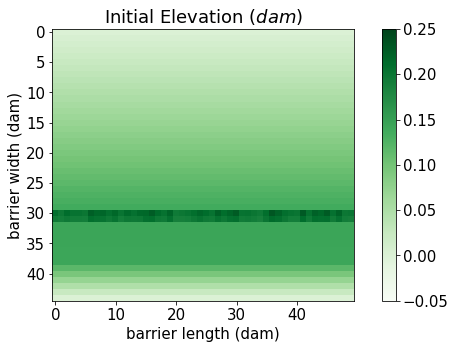

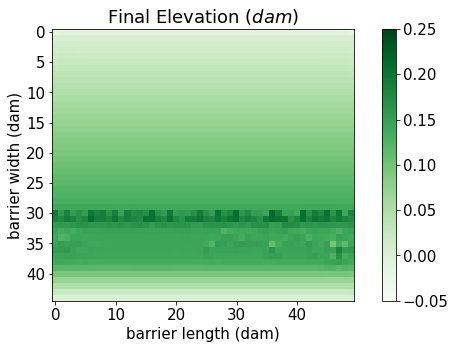

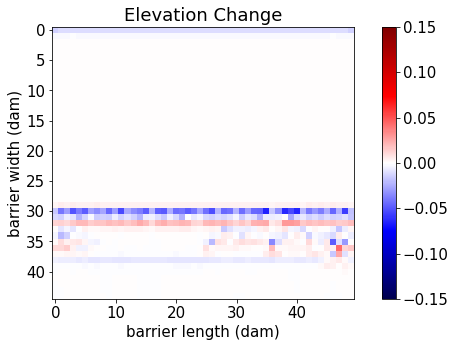

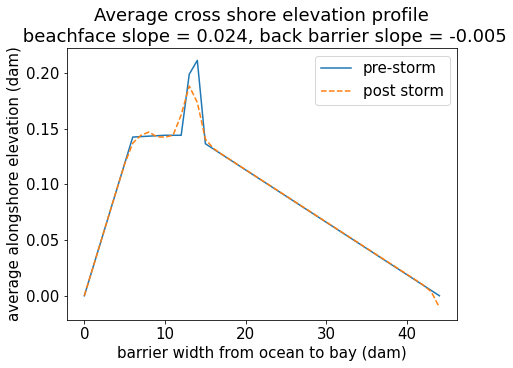

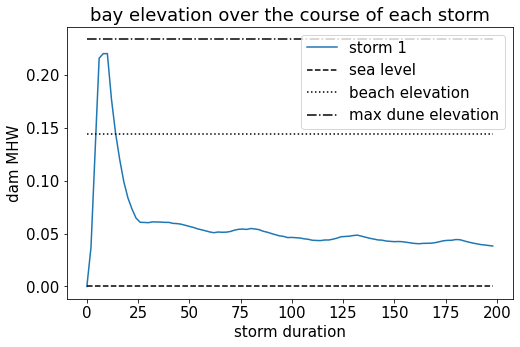

[ * elevation GIF successfully generated * ]

[ * discharge GIF successfully generated * ]

[ * slope GIF successfully generated * ]

[ * SedOut GIF successfully generated * ]

[ * SedIn GIF successfully generated * ]


In [6]:
initial_domain = domain_array[0]
final_domain = domain_array[1]

plt.rcParams['figure.figsize'] = (10,5)

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    initial_domain,
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
fig1.colorbar(mat)
ax1.set_title("Initial Elevation $(dam)$")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()
fig1.savefig(newpath + "0_domain", facecolor='w')

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :],
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("Elevation after storm {0} $(dam)$".format(n + 1))
ax2.set_title("Final Elevation $(dam)$")
plt.gca().xaxis.tick_bottom()
fig2.colorbar(mat2)
fig2.savefig(newpath + "final_domain", facecolor='w')

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change,
    # origin="upper",
    cmap="seismic",
    vmin=-0.15, vmax=0.15,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
fig3.colorbar(mat3)
fig3.savefig(newpath + "elev_change_domain", facecolor='w')

plt.rcParams['figure.figsize'] = (7,5)


### AVERAGE ELEVATION PLOT------------------------------------------------------------------------------------------------------
# plotting pre-storm cross section for row 21 (a gap where overwash occurs)
cross_section = np.mean(initial_domain, 1)
cross_section = np.flip(cross_section)
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.plot(range(len(initial_domain)), cross_section, label="pre-storm")


# plotting post-storm cross section
m_beach = 0.0004
cross_section2 = np.mean(final_domain, 1)
cross_section2 = np.flip(cross_section2)
ax4.plot(range(len(final_domain)), cross_section2, label="post storm", linestyle="dashed")
# dune_gap_el = np.flip(full_domain[:, 21])
# ax4.plot(range(len(full_domain)), dune_gap_el, label="dune gap (21) post", linestyle="dashed")
ax4.set_xlabel("barrier width from ocean to bay (dam)")
ax4.set_ylabel("average alongshore elevation (dam)")
# ax4.set_title("Cross shore elevation profile for col 21\n "
#               "beachface slope = {0}, back barrier slope = {1}".format(round(m_beachface, 3), round(Si, 3)))
ax4.set_title("Average cross shore elevation profile\n "
              "beachface slope = {0}, back barrier slope = {1}".format(round(outwash._m_beachface, 3),
                                                                       round(outwash._Si, 3)))
ax4.legend()
plt.show()
# plt.savefig(newpath + "cross_shore_21")
fig4.savefig(newpath + "avg_cross_shore", facecolor='w')

### HYDROGRAPH------------------------------------------------------------------------------------------------------------------
# plot the bay elevation throughout each storm with sea level and beach elevation references
plt.rcParams['figure.figsize'] = (8,5)

numstorm = storm_series[0]
x = range(0, storm_series[2])
sea_level_line = outwash._sea_level * np.ones(len(x))
beach_elev_line = outwash._beach_elev * np.ones(len(x))
dune_elev_line = max(outwash._dune_crest + outwash._berm_el) * np.ones(len(x))

for n in range(numstorm):
    fig5 = plt.figure()
    ax5 = fig5.add_subplot(111)
    ax5.plot(x, storm_series[1], label='storm {0}'.format(n + 1))
    # if we have multiple storms, will only need to plot these once
    ax5.plot(x, sea_level_line, 'k', linestyle='dashed', label='sea level')
    ax5.plot(x, beach_elev_line, 'k', linestyle='dotted', label='beach elevation')
    ax5.plot(x, dune_elev_line, 'k', linestyle='dashdot', label='max dune elevation')
    ax5.set_xlabel("storm duration")
    ax5.set_ylabel("dam MHW")
    ax5.set_title("bay elevation over the course of each storm")
    ax5.legend()
    plt.show()
    fig5.savefig(newpath + "hydrograph", facecolor='w')
    plt.close()
    
### GIFS------------------------------------------------------------------------------------------------------------------------

start = OW_TS[0]
stop = OW_TS[-1]
dir = newpath
plot_ElevAnimation(elev_change, dir, start, stop)
plot_DischargeAnimation(discharge, dir, start, stop)
plot_SlopeAnimation(slopes2, dir, start, stop)
# plot_Qs2Animation(qs2, dir, TMAX)
plot_SedOutAnimation(sedout, dir, start, stop)
plot_SedInAnimation(sedin, dir, start, stop)
# time_step = [0]
# plot_ModelTransects(b3d, time_step)

<div class="alert alert-block alert-info"><b>Configuration:</b> Substep = 2, Cx = 10, Ki = 7.5x10$^{-3}$.
    Apply a fudge factor to the first row to simulate appropriate flows at the dune gaps: sum all cellular discharges through gaps and divide by the alongshore length. Multiply by a fudge factor (2)
</div>

In [7]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
b3d.update()
b3d.update_dune_domain()

path = "C:/Users/Lexi/Documents/Research/Outwasher/Output/edgesedited_bay220limited/discharge_comp/"
runID = "no_dune_erosion_FF2_Kie-3_substep2"
newpath = path + runID + "/"
# storm series is year the storm occured, the bay elevation for every time step, and the duration of the storm
storm_series = [1, sound_data, len(sound_data)]

outwash = Outwasher(b3d, runID, path, substep=2, Cx=10, Ki=7.5E-3,)
discharge, elev_change, domain, qs_lost, slopes2, dictionary, qs2, storm_data, sedout, sedin, domain_array, OW_TS \
    = outwash.update(storm_series, b3d, fudge_fac=2)

0
1
2
3
4
5
6
calculated discharge through gaps: [6.10927907 6.10927907 6.10927907 6.10927907 6.10927907 0.
 0.         0.         0.         0.         0.         2.48858982
 2.48858982 2.48858982 0.         0.         0.         2.72445496
 0.         0.         8.16814998 8.16814998 8.16814998 0.
 0.         3.6606851  0.         0.         0.         0.
 0.         7.29543891 7.29543891 7.29543891 7.29543891 0.
 0.         0.         6.20632221 6.20632221 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
discharge at dune gaps after flow routing: [3.26970716 5.79034046 5.01330515 5.40006463 5.43766972 5.66327421
 4.51993962 4.92823275 4.87529959 5.24516208 4.77088081 5.4257346
 4.82477751 5.25317668 4.90706861 4.8833678  4.39680904 5.00378046
 5.35475317 4.43405281 5.62045391 5.40695143 5.21762747 4.97277559
 4.66927752 5.00160364 5.45355851 4.463321   5.19593638 4.7834119
 4.29511221 5.35720582 5.11455551 5.30926332 5.68785302 5.07250

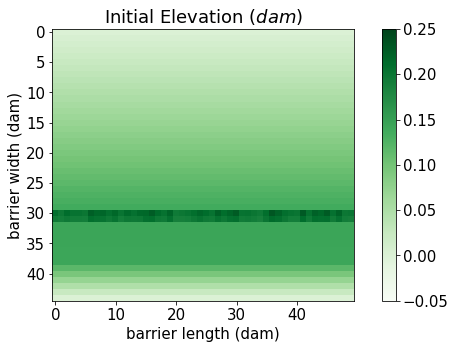

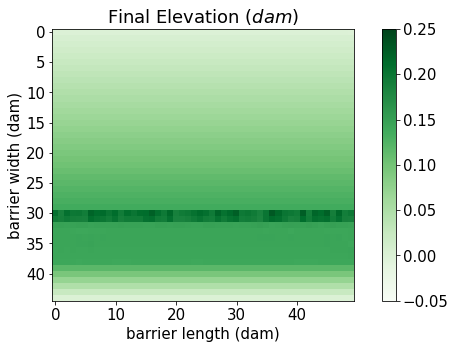

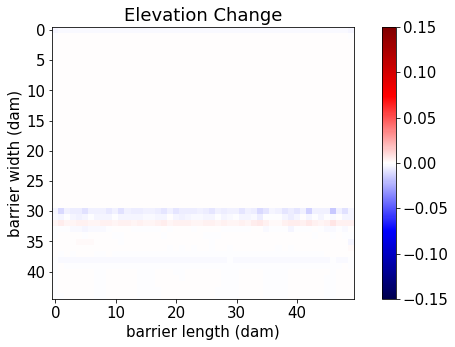

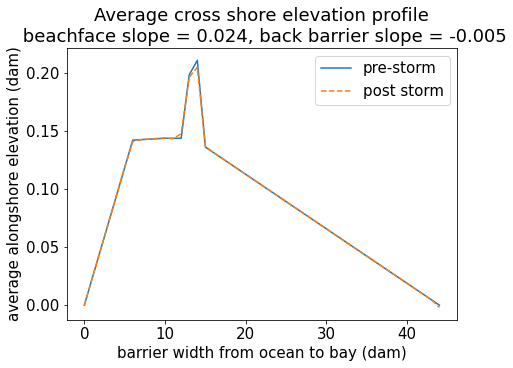

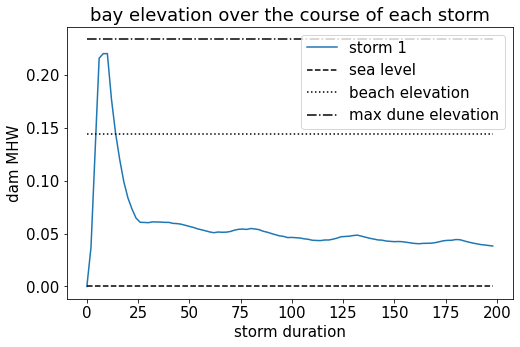

In [8]:
initial_domain = domain_array[0]
final_domain = domain_array[1]

plt.rcParams['figure.figsize'] = (10,5)

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    initial_domain,
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
fig1.colorbar(mat)
ax1.set_title("Initial Elevation $(dam)$")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()
fig1.savefig(newpath + "0_domain", facecolor='w')

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :],
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("Elevation after storm {0} $(dam)$".format(n + 1))
ax2.set_title("Final Elevation $(dam)$")
plt.gca().xaxis.tick_bottom()
fig2.colorbar(mat2)
fig2.savefig(newpath + "final_domain", facecolor='w')

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change,
    # origin="upper",
    cmap="seismic",
    vmin=-0.15, vmax=0.15,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
fig3.colorbar(mat3)
fig3.savefig(newpath + "elev_change_domain", facecolor='w')

plt.rcParams['figure.figsize'] = (7,5)


### AVERAGE ELEVATION PLOT------------------------------------------------------------------------------------------------------
# plotting pre-storm cross section for row 21 (a gap where overwash occurs)
cross_section = np.mean(initial_domain, 1)
cross_section = np.flip(cross_section)
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.plot(range(len(initial_domain)), cross_section, label="pre-storm")


# plotting post-storm cross section
m_beach = 0.0004
cross_section2 = np.mean(final_domain, 1)
cross_section2 = np.flip(cross_section2)
ax4.plot(range(len(final_domain)), cross_section2, label="post storm", linestyle="dashed")
# dune_gap_el = np.flip(full_domain[:, 21])
# ax4.plot(range(len(full_domain)), dune_gap_el, label="dune gap (21) post", linestyle="dashed")
ax4.set_xlabel("barrier width from ocean to bay (dam)")
ax4.set_ylabel("average alongshore elevation (dam)")
# ax4.set_title("Cross shore elevation profile for col 21\n "
#               "beachface slope = {0}, back barrier slope = {1}".format(round(m_beachface, 3), round(Si, 3)))
ax4.set_title("Average cross shore elevation profile\n "
              "beachface slope = {0}, back barrier slope = {1}".format(round(outwash._m_beachface, 3),
                                                                       round(outwash._Si, 3)))
ax4.legend()
plt.show()
# plt.savefig(newpath + "cross_shore_21")
fig4.savefig(newpath + "avg_cross_shore", facecolor='w')

### HYDROGRAPH------------------------------------------------------------------------------------------------------------------
# plot the bay elevation throughout each storm with sea level and beach elevation references
plt.rcParams['figure.figsize'] = (8,5)

numstorm = storm_series[0]
x = range(0, storm_series[2])
sea_level_line = outwash._sea_level * np.ones(len(x))
beach_elev_line = outwash._beach_elev * np.ones(len(x))
dune_elev_line = max(outwash._dune_crest + outwash._berm_el) * np.ones(len(x))

for n in range(numstorm):
    fig5 = plt.figure()
    ax5 = fig5.add_subplot(111)
    ax5.plot(x, storm_series[1], label='storm {0}'.format(n + 1))
    # if we have multiple storms, will only need to plot these once
    ax5.plot(x, sea_level_line, 'k', linestyle='dashed', label='sea level')
    ax5.plot(x, beach_elev_line, 'k', linestyle='dotted', label='beach elevation')
    ax5.plot(x, dune_elev_line, 'k', linestyle='dashdot', label='max dune elevation')
    ax5.set_xlabel("storm duration")
    ax5.set_ylabel("dam MHW")
    ax5.set_title("bay elevation over the course of each storm")
    ax5.legend()
    plt.show()
    fig5.savefig(newpath + "hydrograph", facecolor='w')
    plt.close()
    
### GIFS------------------------------------------------------------------------------------------------------------------------

# start = OW_TS[0]
# stop = OW_TS[-1]
# dir = newpath
# plot_ElevAnimation(elev_change, dir, start, stop)
# plot_DischargeAnimation(discharge, dir, start, stop)
# plot_SlopeAnimation(slopes2, dir, start, stop)
# # plot_Qs2Animation(qs2, dir, TMAX)
# plot_SedOutAnimation(sedout, dir, start, stop)
# plot_SedInAnimation(sedin, dir, start, stop)
# # time_step = [0]
# # plot_ModelTransects(b3d, time_step)

<div class="alert alert-block alert-info"><b>Configuration:</b> Substep = 2, Cx = 10, Ki = 7.5x10$^{-3}$.
    Apply a fudge factor to the first row to simulate appropriate flows at the dune gaps: sum all cellular discharges through gaps and divide by the alongshore length. Multiply by a fudge factor (3)
</div>

In [9]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
b3d.update()
b3d.update_dune_domain()

path = "C:/Users/Lexi/Documents/Research/Outwasher/Output/edgesedited_bay220limited/discharge_comp/"
runID = "no_dune_erosion_FF3_Kie-3_substep2"
newpath = path + runID + "/"
# storm series is year the storm occured, the bay elevation for every time step, and the duration of the storm
storm_series = [1, sound_data, len(sound_data)]

outwash = Outwasher(b3d, runID, path, substep=2, Cx=10, Ki=7.5E-3,)
discharge, elev_change, domain, qs_lost, slopes2, dictionary, qs2, storm_data, sedout, sedin, domain_array, OW_TS \
    = outwash.update(storm_series, b3d, fudge_fac=3)

0
1
2
3
4
5
6
calculated discharge through gaps: [6.10927907 6.10927907 6.10927907 6.10927907 6.10927907 0.
 0.         0.         0.         0.         0.         2.48858982
 2.48858982 2.48858982 0.         0.         0.         2.72445496
 0.         0.         8.16814998 8.16814998 8.16814998 0.
 0.         3.6606851  0.         0.         0.         0.
 0.         7.29543891 7.29543891 7.29543891 7.29543891 0.
 0.         0.         6.20632221 6.20632221 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
discharge at dune gaps after flow routing: [4.90456073 8.68551069 7.51995773 8.10009694 8.15650459 8.49491131
 6.77990943 7.39234913 7.31294939 7.86774312 7.15632122 8.13860189
 7.23716627 7.87976502 7.36060292 7.32505171 6.59521355 7.5056707
 8.03212976 6.65107922 8.43068086 8.11042715 7.82644121 7.45916338
 7.00391629 7.50240546 8.18033776 6.6949815  7.79390457 7.17511785
 6.44266831 8.03580872 7.67183326 7.96389498 8.53177952 7.6087

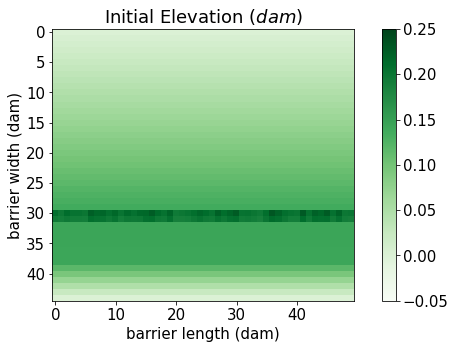

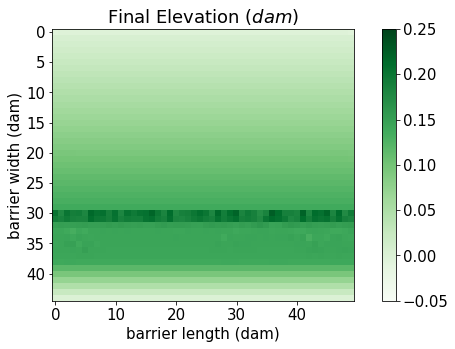

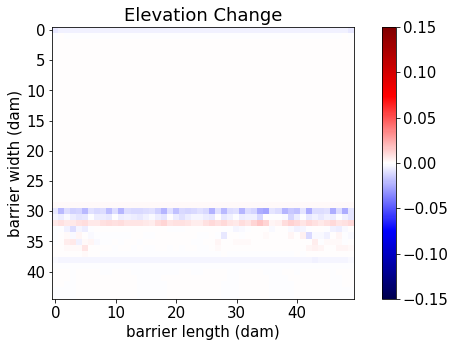

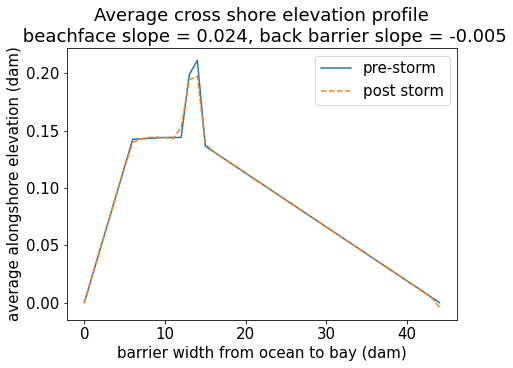

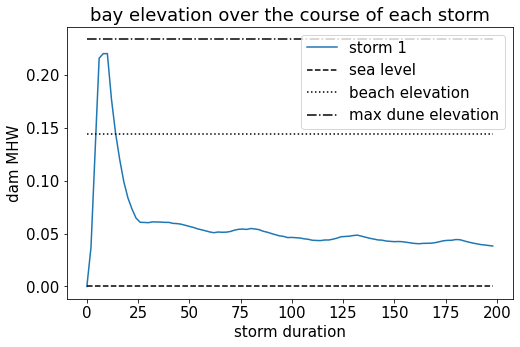

[ * elevation GIF successfully generated * ]

[ * discharge GIF successfully generated * ]

[ * slope GIF successfully generated * ]

[ * SedOut GIF successfully generated * ]

[ * SedIn GIF successfully generated * ]


In [10]:
initial_domain = domain_array[0]
final_domain = domain_array[1]

plt.rcParams['figure.figsize'] = (10,5)

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    initial_domain,
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
fig1.colorbar(mat)
ax1.set_title("Initial Elevation $(dam)$")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()
fig1.savefig(newpath + "0_domain", facecolor='w')

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :],
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("Elevation after storm {0} $(dam)$".format(n + 1))
ax2.set_title("Final Elevation $(dam)$")
plt.gca().xaxis.tick_bottom()
fig2.colorbar(mat2)
fig2.savefig(newpath + "final_domain", facecolor='w')

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change,
    # origin="upper",
    cmap="seismic",
    vmin=-0.15, vmax=0.15,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
fig3.colorbar(mat3)
fig3.savefig(newpath + "elev_change_domain", facecolor='w')

plt.rcParams['figure.figsize'] = (7,5)


### AVERAGE ELEVATION PLOT------------------------------------------------------------------------------------------------------
# plotting pre-storm cross section for row 21 (a gap where overwash occurs)
cross_section = np.mean(initial_domain, 1)
cross_section = np.flip(cross_section)
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.plot(range(len(initial_domain)), cross_section, label="pre-storm")


# plotting post-storm cross section
m_beach = 0.0004
cross_section2 = np.mean(final_domain, 1)
cross_section2 = np.flip(cross_section2)
ax4.plot(range(len(final_domain)), cross_section2, label="post storm", linestyle="dashed")
# dune_gap_el = np.flip(full_domain[:, 21])
# ax4.plot(range(len(full_domain)), dune_gap_el, label="dune gap (21) post", linestyle="dashed")
ax4.set_xlabel("barrier width from ocean to bay (dam)")
ax4.set_ylabel("average alongshore elevation (dam)")
# ax4.set_title("Cross shore elevation profile for col 21\n "
#               "beachface slope = {0}, back barrier slope = {1}".format(round(m_beachface, 3), round(Si, 3)))
ax4.set_title("Average cross shore elevation profile\n "
              "beachface slope = {0}, back barrier slope = {1}".format(round(outwash._m_beachface, 3),
                                                                       round(outwash._Si, 3)))
ax4.legend()
plt.show()
# plt.savefig(newpath + "cross_shore_21")
fig4.savefig(newpath + "avg_cross_shore", facecolor='w')

### HYDROGRAPH------------------------------------------------------------------------------------------------------------------
# plot the bay elevation throughout each storm with sea level and beach elevation references
plt.rcParams['figure.figsize'] = (8,5)

numstorm = storm_series[0]
x = range(0, storm_series[2])
sea_level_line = outwash._sea_level * np.ones(len(x))
beach_elev_line = outwash._beach_elev * np.ones(len(x))
dune_elev_line = max(outwash._dune_crest + outwash._berm_el) * np.ones(len(x))

for n in range(numstorm):
    fig5 = plt.figure()
    ax5 = fig5.add_subplot(111)
    ax5.plot(x, storm_series[1], label='storm {0}'.format(n + 1))
    # if we have multiple storms, will only need to plot these once
    ax5.plot(x, sea_level_line, 'k', linestyle='dashed', label='sea level')
    ax5.plot(x, beach_elev_line, 'k', linestyle='dotted', label='beach elevation')
    ax5.plot(x, dune_elev_line, 'k', linestyle='dashdot', label='max dune elevation')
    ax5.set_xlabel("storm duration")
    ax5.set_ylabel("dam MHW")
    ax5.set_title("bay elevation over the course of each storm")
    ax5.legend()
    plt.show()
    fig5.savefig(newpath + "hydrograph", facecolor='w')
    plt.close()
    
### GIFS------------------------------------------------------------------------------------------------------------------------

start = OW_TS[0]
stop = OW_TS[-1]
dir = newpath
plot_ElevAnimation(elev_change, dir, start, stop)
plot_DischargeAnimation(discharge, dir, start, stop)
plot_SlopeAnimation(slopes2, dir, start, stop)
# plot_Qs2Animation(qs2, dir, TMAX)
plot_SedOutAnimation(sedout, dir, start, stop)
plot_SedInAnimation(sedin, dir, start, stop)
# time_step = [0]
# plot_ModelTransects(b3d, time_step)

<div class="alert alert-block alert-info"><b>Configuration:</b> Substep = 20, Cx = 10, Ki = 7.5x10$^{-3}$.
    Apply a fudge factor to the first row to simulate appropriate flows at the dune gaps: sum all cellular discharges through gaps and divide by the alongshore length. Multiply by a fudge factor (1)
</div>

In [11]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
b3d.update()
b3d.update_dune_domain()

path = "C:/Users/Lexi/Documents/Research/Outwasher/Output/edgesedited_bay220limited/discharge_comp/"
runID = "no_dune_erosion_FF1_Kie-3_substep20"
newpath = path + runID + "/"
# storm series is year the storm occured, the bay elevation for every time step, and the duration of the storm
storm_series = [1, sound_data, len(sound_data)]

outwash = Outwasher(b3d, runID, path, substep=20, Cx=10, Ki=7.5E-3,)
discharge, elev_change, domain, qs_lost, slopes2, dictionary, qs2, storm_data, sedout, sedin, domain_array, OW_TS \
    = outwash.update(storm_series, b3d, fudge_fac=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
calculated discharge through gaps: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
discharge at dune gaps after flow routing: [0.08207381 0.14534491 0.12584034 0.13554849 0.13649243 0.14215539
 0.11345623 0.12370491 0.12237622 0.13166024 0.11975518 0.13619284
 0.12110805 0.13186142 0.12317366 0.12257874 0.1103655  0.12560125
 0.13441111 0.11130036 0.14108054 0.13572136 0.13096909 0.12482299
 0.1172048  0.12554661 0.13689125 0.11203503 0.13042461 0.12006972
 0.10781278 0.13447268 0.12838185 0.13326926 0.14277234 0.12732634
 0.10342859 0.11730787 0.12993577 0.13551678 0.13839777 0.10666913
 0.1389234  0.1202177  0.12664605 0.11459831 0.140243   0.11848783
 0.14356958 0.08892159]
57
calculated discharge through gaps: [0.      

discharge at dune gaps after flow routing: [1.60320351 2.84048721 2.45833106 2.64819014 2.66669722 2.7785294
 2.21636059 2.4167875  2.39093918 2.5724819  2.33947201 2.6619748
 2.36594089 2.57626676 2.40660744 2.39490591 2.15603522 2.45403783
 2.62683515 2.17401888 2.75737386 2.65165144 2.55883003 2.4387644
 2.28966019 2.45283092 2.67551061 2.18858268 2.54839678 2.34578762
 2.1060932  2.62817053 2.50800195 2.60350625 2.79058529 2.48815762
 2.02028333 2.29171557 2.53911451 2.64775136 2.70456233 2.08326581
 2.71731988 2.34829908 2.47384129 2.23860823 2.74200817 2.31428713
 2.80602104 1.73696395]
64
calculated discharge through gaps: [6.81311223 6.81311223 6.81311223 6.81311223 6.81311223 0.
 0.         0.         0.         2.50708333 2.50708333 2.50708333
 2.50708333 2.50708333 0.         0.         0.         3.26905584
 0.         0.         8.94105935 8.94105935 8.94105935 0.
 0.         4.25839752 0.         0.         0.         0.
 0.         8.04065088 8.04065088 8.04065088 8.0406

discharge at dune gaps after flow routing: [1.91948998 3.40445715 2.94386368 3.17175885 3.19409626 3.3311403
 2.65399244 2.89456535 2.86389092 3.08175348 2.80157201 3.19137825
 2.83337356 3.08590327 2.88288929 2.86866984 2.5818906  2.93970617
 3.14842735 2.60270218 3.30539579 3.17612452 3.06501257 2.92123312
 2.74195144 2.93789677 3.20730218 2.62069104 3.05304881 2.80958004
 2.52189304 3.15037086 3.00340168 3.11784037 3.34559796 2.98164987
 2.41868542 2.74448145 3.04288141 3.17166515 3.24107602 2.49329392
 3.26284896 2.81159919 2.9617901  2.6803951  3.29008654 2.77023352
 3.36365166 2.07964209]
72
calculated discharge through gaps: [8.29532351 8.29532351 8.29532351 8.29532351 8.29532351 0.
 0.         2.24251664 2.24251664 2.24251664 2.24251664 2.24251664
 2.24251664 2.24251664 2.24251664 0.         0.         4.45289928
 0.         0.         7.07107094 7.07107094 7.07107094 7.07107094
 7.07107094 7.07107094 0.         0.         0.         0.
 0.         9.60169004 9.60169004 9.60169

discharge at dune gaps after flow routing: [2.21067009 3.92683263 3.39133969 3.65474822 3.68076899 3.84369896
 3.05723403 3.33528471 3.30039574 3.55214265 3.22748983 3.68240459
 3.26429805 3.55628827 3.32266879 3.30595238 2.97439664 3.38815638
 3.63149723 2.99720168 3.81337563 3.66014144 3.53221175 3.36657439
 3.15885975 3.38547685 3.70027322 3.01881029 3.51929491 3.23744009
 2.90496846 3.63429379 3.46002349 3.59197718 3.86041973 3.43822189
 2.78532868 3.16186684 3.50920723 3.65533927 3.73750839 2.86997036
 3.77314221 3.2381555  3.41061905 3.08679189 3.80395066 3.18900638
 3.8801229  2.39514543]
79
calculated discharge through gaps: [ 9.66971261  9.66971261  9.66971261  9.66971261  9.66971261  0.
  0.          3.16182851  3.16182851  3.16182851  3.16182851  3.16182851
  3.16182851  3.16182851  3.16182851  0.          0.          5.5842986
  0.          0.          8.37791848  8.37791848  8.37791848  8.37791848
  8.37791848  8.37791848  0.          0.          1.81364076  0.
  0.       

discharge at dune gaps after flow routing: [2.32670063 4.1411026  3.57058503 3.84908321 3.87687513 4.05513392
 3.21860775 3.51256936 3.4764252  3.74253265 3.3981788  3.88496015
 3.43716748 3.74602347 3.50040016 3.48235257 3.13169077 3.5694026
 3.82942976 3.15414888 4.02232109 3.85526186 3.72067174 3.54627081
 3.32600196 3.56577945 3.90311373 3.17807199 3.7082372  3.40962765
 3.05817887 3.83311583 3.64304084 3.78213478 4.07288629 3.6244189
 2.93121373 3.32928622 3.6997506  3.85067161 3.94006187 3.01859016
 3.99165709 3.40822077 3.58892651 3.2483677  4.02471401 3.35429548
 4.09193626 2.52095002]
86
calculated discharge through gaps: [ 9.87172268  9.87172268  9.87172268  9.87172268  9.87172268  0.
  0.          3.30152816  3.30152816  3.30152816  3.30152816  3.30152816
  3.30152816  3.30152816  3.30152816  0.          0.          5.75277959
  0.          0.          8.57056615  8.57056615  8.57056615  8.57056615
  8.57056615  8.57056615  0.          0.          1.93008767  0.
  0.        

discharge at dune gaps after flow routing: [2.32588585 4.14854297 3.57069037 3.85041966 3.87864726 4.06384826
 3.21851917 3.51375187 3.47820599 3.74545382 3.3984135  3.89333981
 3.43765283 3.74800392 3.50273657 3.48422411 3.1319082  3.57180674
 3.83576779 3.15276739 4.03011571 3.85714535 3.72266243 3.54824027
 3.32633026 3.56734139 3.91077766 3.17789653 3.71144973 3.41087878
 3.05796485 3.8402205  3.64332845 3.78260555 4.08183212 3.62918643
 2.92994499 3.32973121 3.70513499 3.85306079 3.94535959 3.01552835
 4.01156113 3.40721855 3.58703768 3.24685241 4.04525157 3.35106053
 4.09902371 2.52024707]
93
calculated discharge through gaps: [ 9.87172268  9.87172268  9.87172268  9.87172268  9.87172268  0.
  0.          3.30152816  3.30152816  3.30152816  3.30152816  3.30152816
  3.30152816  3.30152816  3.30152816  0.          0.          5.75277959
  0.          0.          8.57056615  8.57056615  8.57056615  8.57056615
  8.57056615  8.57056615  0.          0.          1.93008767  0.
  0.      

discharge at dune gaps after flow routing: [2.32492577 4.15657686 3.5706919  3.85169207 3.88040995 4.07262736
 3.21840607 3.51492639 3.47997643 3.74842027 3.39861325 3.90182547
 3.43811263 3.74997613 3.50508245 3.4860982  3.13210596 3.57423133
 3.84214034 3.15135168 4.0379622  3.85902515 3.72466051 3.55021316
 3.32663998 3.56889927 3.91849888 3.17769385 3.71470528 3.41211898
 3.05772622 3.84736866 3.64358344 3.78305004 4.09093426 3.63398137
 2.92862463 3.33015316 3.71055198 3.85547857 3.95064698 3.01239433
 4.03168827 3.40615713 3.58508636 3.24527227 4.06601086 3.34776114
 4.10612531 2.51952574]
100
calculated discharge through gaps: [ 9.87172268  9.87172268  9.87172268  9.87172268  9.87172268  0.
  0.          3.30152816  3.30152816  3.30152816  3.30152816  3.30152816
  3.30152816  3.30152816  3.30152816  0.          0.          5.75277959
  0.          0.          8.57056615  8.57056615  8.57056615  8.57056615
  8.57056615  8.57056615  0.          0.          1.93008767  0.
  0.     

discharge at dune gaps after flow routing: [0.29773359 0.53305269 0.45738087 0.49346719 0.49718567 0.52229493
 0.41225573 0.45032832 0.44589221 0.48036437 0.43536042 0.50039823
 0.44043857 0.48049208 0.44914892 0.44668427 0.40122267 0.45801269
 0.49260321 0.40357614 0.51778956 0.49445474 0.47725195 0.45490398
 0.42614947 0.45726862 0.50247849 0.40703431 0.47606535 0.43716344
 0.39166463 0.4933268  0.46674404 0.48462249 0.52466777 0.46582997
 0.37505124 0.42660697 0.4756814  0.4940393  0.50642528 0.38565592
 0.51784058 0.43623871 0.45909741 0.415594   0.5222806  0.42860408
 0.52646766 0.32269044]
108
calculated discharge through gaps: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         2.01476805 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.75271382 0.         0.
 0. 

1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868


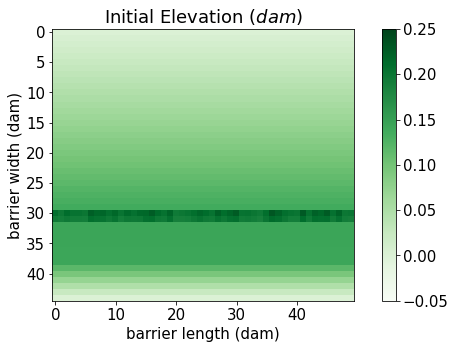

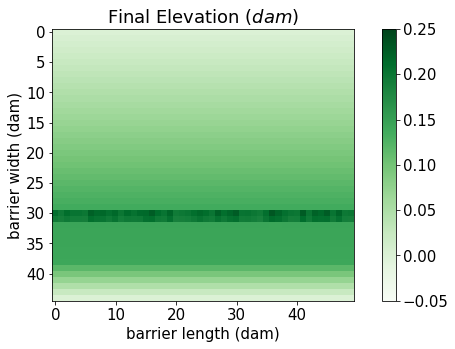

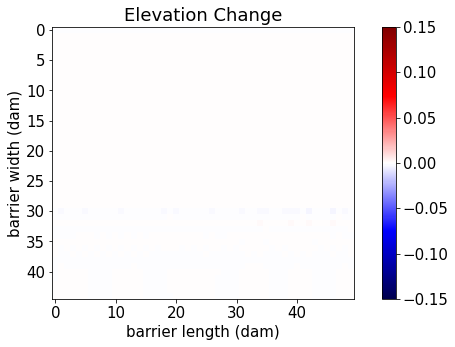

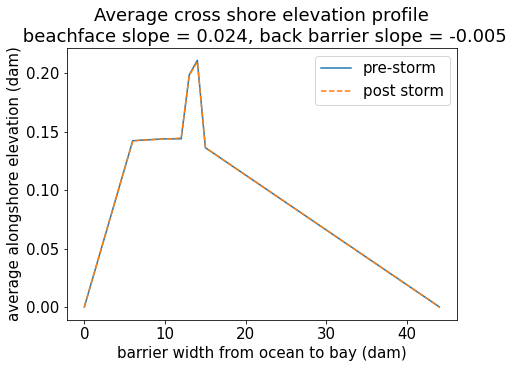

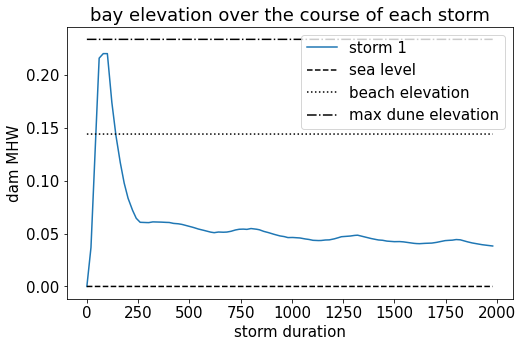

[ * elevation GIF successfully generated * ]

[ * discharge GIF successfully generated * ]

[ * slope GIF successfully generated * ]

[ * SedOut GIF successfully generated * ]

[ * SedIn GIF successfully generated * ]


In [12]:
initial_domain = domain_array[0]
final_domain = domain_array[1]

plt.rcParams['figure.figsize'] = (10,5)

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    initial_domain,
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
fig1.colorbar(mat)
ax1.set_title("Initial Elevation $(dam)$")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()
fig1.savefig(newpath + "0_domain", facecolor='w')

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :],
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("Elevation after storm {0} $(dam)$".format(n + 1))
ax2.set_title("Final Elevation $(dam)$")
plt.gca().xaxis.tick_bottom()
fig2.colorbar(mat2)
fig2.savefig(newpath + "final_domain", facecolor='w')

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change,
    # origin="upper",
    cmap="seismic",
    vmin=-0.15, vmax=0.15,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
fig3.colorbar(mat3)
fig3.savefig(newpath + "elev_change_domain", facecolor='w')

plt.rcParams['figure.figsize'] = (7,5)


### AVERAGE ELEVATION PLOT------------------------------------------------------------------------------------------------------
# plotting pre-storm cross section for row 21 (a gap where overwash occurs)
cross_section = np.mean(initial_domain, 1)
cross_section = np.flip(cross_section)
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.plot(range(len(initial_domain)), cross_section, label="pre-storm")


# plotting post-storm cross section
m_beach = 0.0004
cross_section2 = np.mean(final_domain, 1)
cross_section2 = np.flip(cross_section2)
ax4.plot(range(len(final_domain)), cross_section2, label="post storm", linestyle="dashed")
# dune_gap_el = np.flip(full_domain[:, 21])
# ax4.plot(range(len(full_domain)), dune_gap_el, label="dune gap (21) post", linestyle="dashed")
ax4.set_xlabel("barrier width from ocean to bay (dam)")
ax4.set_ylabel("average alongshore elevation (dam)")
# ax4.set_title("Cross shore elevation profile for col 21\n "
#               "beachface slope = {0}, back barrier slope = {1}".format(round(m_beachface, 3), round(Si, 3)))
ax4.set_title("Average cross shore elevation profile\n "
              "beachface slope = {0}, back barrier slope = {1}".format(round(outwash._m_beachface, 3),
                                                                       round(outwash._Si, 3)))
ax4.legend()
plt.show()
# plt.savefig(newpath + "cross_shore_21")
fig4.savefig(newpath + "avg_cross_shore", facecolor='w')

### HYDROGRAPH------------------------------------------------------------------------------------------------------------------
# plot the bay elevation throughout each storm with sea level and beach elevation references
plt.rcParams['figure.figsize'] = (8,5)

numstorm = storm_series[0]
x = range(0, storm_series[2])
sea_level_line = outwash._sea_level * np.ones(len(x))
beach_elev_line = outwash._beach_elev * np.ones(len(x))
dune_elev_line = max(outwash._dune_crest + outwash._berm_el) * np.ones(len(x))

for n in range(numstorm):
    fig5 = plt.figure()
    ax5 = fig5.add_subplot(111)
    ax5.plot(x, storm_series[1], label='storm {0}'.format(n + 1))
    # if we have multiple storms, will only need to plot these once
    ax5.plot(x, sea_level_line, 'k', linestyle='dashed', label='sea level')
    ax5.plot(x, beach_elev_line, 'k', linestyle='dotted', label='beach elevation')
    ax5.plot(x, dune_elev_line, 'k', linestyle='dashdot', label='max dune elevation')
    ax5.set_xlabel("storm duration")
    ax5.set_ylabel("dam MHW")
    ax5.set_title("bay elevation over the course of each storm")
    ax5.legend()
    plt.show()
    fig5.savefig(newpath + "hydrograph", facecolor='w')
    plt.close()
    
### GIFS------------------------------------------------------------------------------------------------------------------------

start = OW_TS[0]
stop = OW_TS[-1]
dir = newpath
plot_ElevAnimation(elev_change, dir, start, stop)
plot_DischargeAnimation(discharge, dir, start, stop)
plot_SlopeAnimation(slopes2, dir, start, stop)
# plot_Qs2Animation(qs2, dir, TMAX)
plot_SedOutAnimation(sedout, dir, start, stop)
plot_SedInAnimation(sedin, dir, start, stop)
# time_step = [0]
# plot_ModelTransects(b3d, time_step)